 <font color='744fdb' size=6> **Метод главных компонент (principal component analysis, PCA)**


In [ ]:
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = np.arange(1,21)
y = 2 * x + np.random.randn(20)*2

In [ ]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

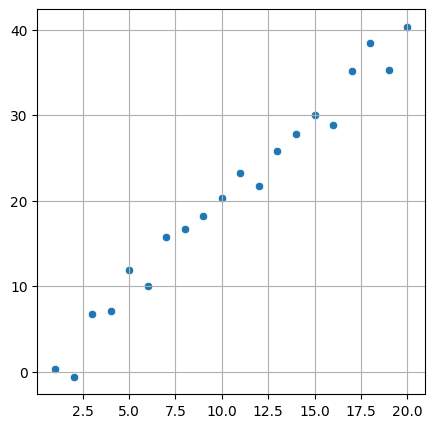

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=x, y=y)
plt.grid(True)
plt.show()

In [ ]:
# центрируем
x_centr = x - x.mean()
y_centr = y - y.mean()

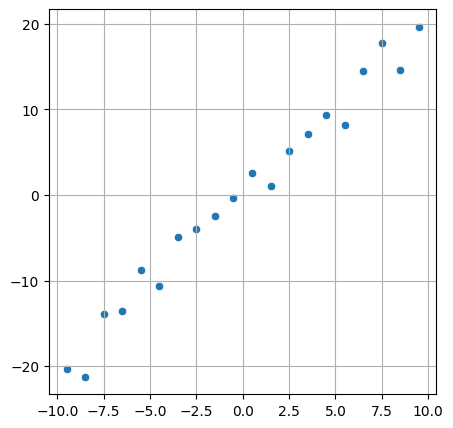

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=x_centr, y=y_centr)
plt.grid(True)
plt.show()

Ковариационная матрица - это матрица, у которой $ (i,j) $-элемент является корреляцией признаков $(X_i, X_j)$. Вспомним формулу ковариации:
$$
Cov(X_i, X_j) = E \left[ (X_i - E(X_i)) \cdot (X_j - E(X_j)) \right] = E(X_i X_j) - E(X_i) \cdot E(X_j)
$$

В нашем случае она упрощается, так как $E(X_i) = E(X_j) = 0$:
$$
Cov(X_i, X_j) = E(X_i X_j)
$$

Заметим, что когда $X_i = X_j$:
$$
Cov(X_i, X_i) = Var(X_i)
$$

и это справедливо для любых случайных величин.


Замечание: Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия.

In [ ]:
X_centr = np.vstack((x_centr, y_centr))

In [ ]:
X_centr

array([[ -9.5       ,  -8.5       ,  -7.5       ,  -6.5       ,
         -5.5       ,  -4.5       ,  -3.5       ,  -2.5       ,
         -1.5       ,  -0.5       ,   0.5       ,   1.5       ,
          2.5       ,   3.5       ,   4.5       ,   5.5       ,
          6.5       ,   7.5       ,   8.5       ,   9.5       ],
       [-20.32428508, -21.24999361, -13.85498468, -13.57976682,
         -8.79218452, -10.64702536,  -4.85500744,  -3.95884298,
         -2.45713235,  -0.34856642,   2.6038841 ,   1.06494061,
          5.19918366,   7.14402237,   9.31544852,   8.15595271,
         14.53076311,  17.77648   ,  14.6153129 ,  19.66180128]])

In [ ]:
covmat = np.cov(X_centr)

In [ ]:
covmat

array([[ 35.        ,  71.54601306],
       [ 71.54601306, 149.6680943 ]])

Найдем вектор, при котором максимизировался бы  размер (дисперсия) проекции нашей выборки на него

Мы хотим найти вектор w, который даёт максимальную дисперсию проекции данных X на него, при этом сам по себе w должен быть единичной длины (чтобы не "накручивать" дисперсию за счёт масштаба).

Рассмотрим выборку данных $X$ и вектор направления $w$. Проекция данных $X$ на $w$ определяется как $Xw$. Нам нужно максимизировать дисперсию этой проекции, которая вычисляется как:
$$
\text{Var}(Xw) = w^T Q w
$$

Для нахождения $w$, которое максимизирует дисперсию, необходимо нормировать $w$ так, чтобы $w^T w = 1$.

Формулируем задачу оптимизации:
$$
\max_{w} \, w^T Q w \quad \text{при условии} \quad w^T w = 1
$$

Для решения этой задачи используем метод Лагранжа. Записываем лагранжиан:
$$
L(w, \lambda) = w^T Q w - \lambda (w^T w - 1)
$$

Находим производные по $w$ и $\lambda$ и приравниваем их к нулю:
$$
\frac{\partial L}{\partial w} = 2Q w - 2\lambda w = 0
$$
$$
Q w = \lambda w
$$

Это и есть определение собственного вектора и собственного значения.

Собственные значения $\lambda$ представляют дисперсии вдоль направлений, определяемых соответствующими собственными векторами. Для максимизации дисперсии нужно выбрать вектор, соответствующий наибольшему собственному значению.


Таким образом, направление максимальной дисперсии у проекции всегда совпадает с собственным вектором, имеющим максимальное собственное значение.

###Пример расчета собственнх значений



Предположим, у нас есть ковариационная матрица:
$$
Q = \begin{pmatrix}
4 & 2 \\
2 & 3
\end{pmatrix}
$$

Найдём собственные значения и векторы:

1. Решаем характеристическое уравнение:
$$
\det(Q - \lambda I) = 0
$$

$$
\begin{vmatrix}
4 - \lambda & 2 \\
2 & 3 - \lambda
\end{vmatrix} = 0
$$
$$
(4 - \lambda)(3 - \lambda) - 4 = \lambda^2 - 7\lambda + 8 = 0
$$
Собственные значения: $\lambda_1 = \frac{1+\sqrt{17}}{2}$, $\lambda_2 = \frac{1-\sqrt{17}}{2}$.




Для каждого собственного значения найдём собственный вектор $\mathbf{v} = \begin{pmatrix} x \\ y \end{pmatrix}$, решая
$$
(Q - \lambda I)\mathbf{v} = 0
$$



### продолжим

Функция `np.linalg.eig` из библиотеки NumPy вычисляет собственные значения и собственные векторы квадратной матрицы.

In [ ]:
X_centr

array([[ -9.5       ,  -8.5       ,  -7.5       ,  -6.5       ,
         -5.5       ,  -4.5       ,  -3.5       ,  -2.5       ,
         -1.5       ,  -0.5       ,   0.5       ,   1.5       ,
          2.5       ,   3.5       ,   4.5       ,   5.5       ,
          6.5       ,   7.5       ,   8.5       ,   9.5       ],
       [-20.32428508, -21.24999361, -13.85498468, -13.57976682,
         -8.79218452, -10.64702536,  -4.85500744,  -3.95884298,
         -2.45713235,  -0.34856642,   2.6038841 ,   1.06494061,
          5.19918366,   7.14402237,   9.31544852,   8.15595271,
         14.53076311,  17.77648   ,  14.6153129 ,  19.66180128]])

In [ ]:
a, vecs = np.linalg.eig(covmat)

In [ ]:
a

array([  0.64967036, 184.01842394])

In [ ]:
vecs

array([[-0.90148253, -0.43281548],
       [ 0.43281548, -0.90148253]])

In [ ]:
vecs[0,1], vecs[1,1]

(np.float64(-0.4328154828049614), np.float64(-0.9014825332996244))

In [ ]:
X_centr[1]

array([-20.32428508, -21.24999361, -13.85498468, -13.57976682,
        -8.79218452, -10.64702536,  -4.85500744,  -3.95884298,
        -2.45713235,  -0.34856642,   2.6038841 ,   1.06494061,
         5.19918366,   7.14402237,   9.31544852,   8.15595271,
        14.53076311,  17.77648   ,  14.6153129 ,  19.66180128])

In [ ]:
X_centr[0]

array([-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,
        1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

In [ ]:
X_centr[0] * vecs[0,1] + X_centr[1] * vecs[1,1]

array([ 22.43373508,  22.83542967,  15.73614281,  15.05522324,
        10.30648593,  11.54577707,   5.8915586 ,   4.65086651,
         2.86428512,   0.53063428,  -2.56376378,  -1.60924859,
        -5.76901197,  -7.95506557, -10.34538381,  -9.73293406,
       -15.91252977, -19.27130234, -16.85438091, -21.83651751])

In [ ]:
_, vecs = np.linalg.eig(covmat)
v = -vecs[:,1]
Xnew = np.dot(v,X_centr)

In [ ]:
Xnew

array([-22.43373508, -22.83542967, -15.73614281, -15.05522324,
       -10.30648593, -11.54577707,  -5.8915586 ,  -4.65086651,
        -2.86428512,  -0.53063428,   2.56376378,   1.60924859,
         5.76901197,   7.95506557,  10.34538381,   9.73293406,
        15.91252977,  19.27130234,  16.85438091,  21.83651751])

>найдем через библиотеку

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X_centr.T)

In [ ]:
XPCAreduced

array([[-22.43373508],
       [-22.83542967],
       [-15.73614281],
       [-15.05522324],
       [-10.30648593],
       [-11.54577707],
       [ -5.8915586 ],
       [ -4.65086651],
       [ -2.86428512],
       [ -0.53063428],
       [  2.56376378],
       [  1.60924859],
       [  5.76901197],
       [  7.95506557],
       [ 10.34538381],
       [  9.73293406],
       [ 15.91252977],
       [ 19.27130234],
       [ 16.85438091],
       [ 21.83651751]])

In [ ]:
pca.explained_variance_ratio_

array([0.99648196])

пример применения для графиков

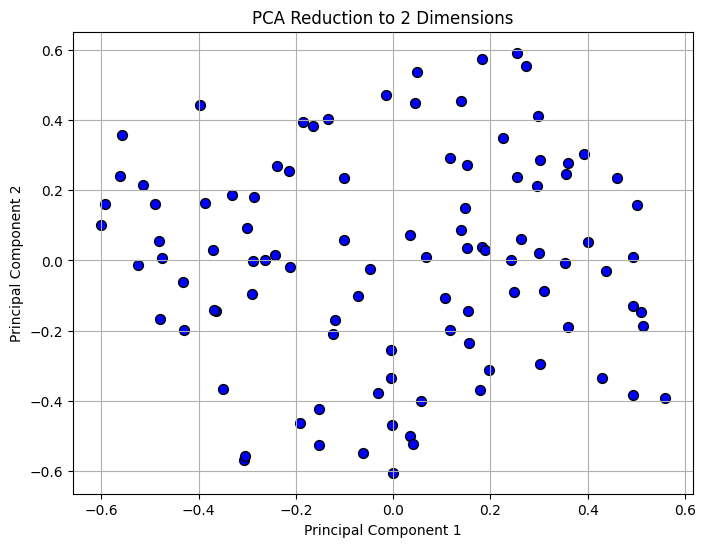

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Создание набора данных с размерностью 10
np.random.seed(42)
data = np.random.rand(100, 3)  # 100 образцов с 10 признаками

# Применение PCA для снижения размерности до 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
# Расчет сохраненной и потерянной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance_ratio)
lost_variance = 1 - total_explained_variance

In [ ]:
total_explained_variance

np.float64(0.7138951916617458)

In [ ]:
lost_variance

np.float64(0.28610480833825425)